# Linear Regression Price Predictor for Used Cars

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

### Section 1: DataFrame Loading, Cleaning

In [2]:
dir()  # Returns you all the variables in the current environment

# Refer to this link: https://stackoverflow.com/questions/633127/viewing-all-defined-variables
# To find out out to view all defined variables in the current environment

['In',
 'LinearRegression',
 'Out',
 'RidgeCV',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'np',
 'patsy',
 'pd',
 'plt',
 'quit',
 'sm',
 'smf',
 'sns']

In [3]:
df_main = pd.read_csv('sgcarmart_used_cars_prices.csv',index_col=0)
df_main

,LISTING_URL,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
0,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,58800.0,5880.0,24-Oct-2009,81000.0,2008,978.0,Auto,NaN,23/10/2019,28040.0,28040.0,NaN,0.0,1799,1219.0,1.0,Mid-Sized Sedan
1,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,62800.0,6270.0,10-Nov-2009,106087.0,2009,1628.0,Auto,NaN,23/10/2019,33532.0,33532.0,NaN,0.0,2354,1680.0,3.0,MPV
2,https://www.sgcarmart.com/used_cars/info.php?I...,Austin,30000.0,16950.0,28-Sep-1972,NaN,1972,NaN,Manual,834.0,23/10/2019,NaN,NaN,4711.0,642.0,998,NaN,NaN,Others
3,https://www.sgcarmart.com/used_cars/info.php?I...,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,Auto,58899.0,23/10/2019,71379.0,71379.0,75889.0,761.0,2995,2250.0,3.0,SUV
4,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,Auto,38024.0,23/10/2019,23465.0,23465.0,39563.0,3503.0,1797,1350.0,2.0,MPV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,104500.0,16550.0,02-Jun-2014,47638.0,2014,3100.0,Auto,78422.0,23/10/2019,45977.0,56368.0,84504.0,1679.0,3456,2030.0,2.0,MPV
3983,https://www.sgcarmart.com/used_cars/info.php?I...,Mercedes-Benz,115000.0,15260.0,11-Mar-2015,51500.0,2012,974.0,Auto,85824.0,23/10/2019,52051.0,65692.0,67901.0,1950.0,1796,1600.0,2.0,Sports Car
3984,https://www.sgcarmart.com/used_cars/info.php?I...,MINI,119800.0,13150.0,07-Jun-2017,16000.0,2017,1210.0,Auto,69888.0,23/10/2019,33570.0,38998.0,53300.0,2769.0,1998,1390.0,1.0,Sports Car
3985,https://www.sgcarmart.com/used_cars/info.php?I...,Nissan,81800.0,9900.0,05-Aug-2016,53339.0,2015,1786.0,Auto,60983.0,23/10/2019,26629.0,29281.0,57501.0,2462.0,2488,1510.0,1.0,Luxury Sedan


In [ ]:
# What is normalizing?
# Search scalar in sklearn
# There are several methods inside and see which one to use

In [4]:
df_main.columns

Index(['LISTING_URL', 'BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE',
       'MILEAGE_KM', 'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'SCRAPE_DATE', 'OMV', 'ARF',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object')

In [5]:
df_clean = df_main.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1)
df_clean

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
0,Honda,58800.0,5880.0,24-Oct-2009,81000.0,2008,978.0,Auto,NaN,28040.0,28040.0,NaN,0.0,1799,1219.0,1.0,Mid-Sized Sedan
1,Honda,62800.0,6270.0,10-Nov-2009,106087.0,2009,1628.0,Auto,NaN,33532.0,33532.0,NaN,0.0,2354,1680.0,3.0,MPV
2,Austin,30000.0,16950.0,28-Sep-1972,NaN,1972,NaN,Manual,834.0,NaN,NaN,4711.0,642.0,998,NaN,NaN,Others
3,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,Auto,58899.0,71379.0,71379.0,75889.0,761.0,2995,2250.0,3.0,SUV
4,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,Auto,38024.0,23465.0,23465.0,39563.0,3503.0,1797,1350.0,2.0,MPV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,Toyota,104500.0,16550.0,02-Jun-2014,47638.0,2014,3100.0,Auto,78422.0,45977.0,56368.0,84504.0,1679.0,3456,2030.0,2.0,MPV
3983,Mercedes-Benz,115000.0,15260.0,11-Mar-2015,51500.0,2012,974.0,Auto,85824.0,52051.0,65692.0,67901.0,1950.0,1796,1600.0,2.0,Sports Car
3984,MINI,119800.0,13150.0,07-Jun-2017,16000.0,2017,1210.0,Auto,69888.0,33570.0,38998.0,53300.0,2769.0,1998,1390.0,1.0,Sports Car
3985,Nissan,81800.0,9900.0,05-Aug-2016,53339.0,2015,1786.0,Auto,60983.0,26629.0,29281.0,57501.0,2462.0,2488,1510.0,1.0,Luxury Sedan


In [6]:
# We see that we have NA entries in this dataset. We want to drop these NA values or they will pose problems for us later

# The null values can be attributed to the fact that some data is not keyed in the listing itself, 
# or formatting issues due to the varying ways of which people organize the information of the car in a single listing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 3986
Data columns (total 17 columns):
BRAND                           3987 non-null object
PRICE                           3962 non-null float64
DEPRE_VALUE_PER_YEAR            3876 non-null float64
REG_DATE                        3987 non-null object
MILEAGE_KM                      3338 non-null float64
MANUFACTURED_YEAR               3987 non-null object
ROAD_TAX_PER_YEAR               3833 non-null float64
TRANSMISSION                    3987 non-null object
DEREG_VALUE_FROM_SCRAPE_DATE    3221 non-null float64
OMV                             3963 non-null float64
ARF                             3957 non-null float64
COE_FROM_SCRAPE_DATE            3236 non-null float64
DAYS_OF_COE_LEFT                3963 non-null float64
ENGINE_CAPACITY_CC              3987 non-null int64
CURB_WEIGHT_KG                  3859 non-null float64
NO_OF_OWNERS                    3925 non-null float64
VEHICLE_TYPE                    398

In [7]:
df_clean.dropna(inplace=True)

In [8]:
# We now have 2584 rows of data after dropping null values

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 3 to 3985
Data columns (total 17 columns):
BRAND                           2584 non-null object
PRICE                           2584 non-null float64
DEPRE_VALUE_PER_YEAR            2584 non-null float64
REG_DATE                        2584 non-null object
MILEAGE_KM                      2584 non-null float64
MANUFACTURED_YEAR               2584 non-null object
ROAD_TAX_PER_YEAR               2584 non-null float64
TRANSMISSION                    2584 non-null object
DEREG_VALUE_FROM_SCRAPE_DATE    2584 non-null float64
OMV                             2584 non-null float64
ARF                             2584 non-null float64
COE_FROM_SCRAPE_DATE            2584 non-null float64
DAYS_OF_COE_LEFT                2584 non-null float64
ENGINE_CAPACITY_CC              2584 non-null int64
CURB_WEIGHT_KG                  2584 non-null float64
NO_OF_OWNERS                    2584 non-null float64
VEHICLE_TYPE                    258

In [9]:
# Taking a look at our data
df_clean.sample(5)

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
2267,Honda,81800.0,8720.0,02-Feb-2018,14800.0,2017,682.0,Auto,49403.0,19116.0,19116.0,42339.0,3019.0,1496,1185.0,1.0,SUV
301,BMW,57300.0,17870.0,14-Mar-2011,99860.0,2011,2362.0,Auto,43145.0,64960.0,64960.0,53400.0,493.0,2979,1700.0,3.0,Luxury Sedan
2564,Nissan,83800.0,10500.0,16-Aug-2016,60930.0,2016,1210.0,Auto,56621.0,23227.0,24518.0,56089.0,2463.0,1997,1626.0,1.0,SUV
2764,BMW,205000.0,22350.0,26-May-2017,26129.0,2017,1210.0,Auto,95079.0,54822.0,70680.0,55414.0,2767.0,1998,1540.0,1.0,Luxury Sedan
3424,Mercedes-Benz,211800.0,18030.0,18-Sep-2019,85.0,2018,1202.0,Auto,86202.0,52322.0,66180.0,36901.0,3290.0,1991,1760.0,1.0,SUV


In [10]:
print(df_clean.columns,'\n',len(df_clean.columns))

# We have 17 features in our columns

Index(['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE', 'MILEAGE_KM',
       'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object') 
 17


In [11]:
len(df_clean[df_clean['TRANSMISSION'] == "Manual"])
# And out of the entire data

37

In [ ]:
# Interesting insights
# Out of all 2584 rows of data, there are only 37 manual cars. I.e. It's obvious but manual cars are really not in demand
# Therefore, I have chosen to drop manual cars since the data points for them are so little

In [31]:
df_clean.loc[df_clean['TRANSMISSION'] == 'Manual']

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
69,Mitsubishi,105000.0,17400.0,04-Nov-2005,189000.0,2005,1694.0,Manual,36527.0,44370.0,48807.0,60519.0,2191.0,1997,1410.0,5.0,Sports Car
73,Audi,75000.0,21470.0,14-Jul-2011,83000.0,2009,1776.0,Manual,52487.0,76004.0,76004.0,62000.0,605.0,2480,1510.0,3.0,Sports Car
103,Honda,78000.0,10480.0,25-Feb-2008,194000.0,2008,1331.0,Manual,37464.0,23832.0,26216.0,50347.0,2713.0,1998,1270.0,5.0,Sports Car
114,Porsche,230000.0,22930.0,21-May-2010,69000.0,2010,3346.0,Manual,37615.0,108446.0,108446.0,37502.0,8.0,3614,1490.0,6.0,Sports Car
130,Honda,92000.0,10100.0,28-Oct-2009,110000.0,2008,1210.0,Manual,29270.0,33887.0,33887.0,32121.0,3322.0,1998,1270.0,4.0,Sports Car
228,Toyota,27800.0,5780.0,13-Aug-2009,155052.0,2009,684.0,Manual,14102.0,11860.0,11860.0,14664.0,1730.0,1497,1075.0,1.0,Mid-Sized Sedan
345,Suzuki,39800.0,5090.0,17-Aug-2007,163800.0,2007,883.0,Manual,35499.0,11813.0,12995.0,45400.0,2829.0,1586,1090.0,2.0,Hatchback
348,Mitsubishi,88800.0,10310.0,06-Jun-2008,150000.0,2008,1331.0,Manual,33335.0,31656.0,31656.0,38712.0,3138.0,1998,1520.0,5.0,Sports Car
364,Hyundai,19800.0,4020.0,23-Sep-2009,71944.0,2009,442.0,Manual,14509.0,6510.0,3171.0,14743.0,1460.0,1086,1122.0,2.0,Hatchback
737,Mitsubishi,24800.0,5480.0,22-May-2009,94000.0,2009,734.0,Manual,11840.0,12304.0,8539.0,13088.0,1647.0,1584,1132.0,1.0,Mid-Sized Sedan


In [32]:
# Choose whether auto/manual -> 1 for auto, 0 for manual (just 1 column only)

df_clean.loc[df_clean['TRANSMISSION'] == 'Manual'].index

Int64Index([  69,   73,  103,  114,  130,  228,  345,  348,  364,  737,  893,
             937,  995, 1137, 1198, 1380, 1441, 1602, 1640, 1744, 1869, 1924,
            2191, 2237, 2356, 2417, 2451, 2525, 2557, 2996, 3000, 3015, 3183,
            3222, 3492, 3741, 3912],
           dtype='int64')

In [33]:
# dropping the rows with these indexes, because .drop works on index
df_clean.drop(df_clean.loc[df_clean['TRANSMISSION'] == 'Manual'].index)  

# Left with 2547 rows in dataset

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
3,Audi,70800.0,16580.0,05-Dec-2011,140800.0,2011,2380.0,Auto,58899.0,71379.0,71379.0,75889.0,761.0,2995,2250.0,3.0,SUV
4,Toyota,65800.0,6850.0,26-Jun-2009,117000.0,2009,974.0,Auto,38024.0,23465.0,23465.0,39563.0,3503.0,1797,1350.0,2.0,MPV
5,Mercedes-Benz,45000.0,18550.0,21-Sep-2010,126000.0,2010,974.0,Auto,31818.0,56154.0,56154.0,41006.0,8.0,1796,1650.0,4.0,Luxury Sedan
7,BMW,70800.0,12680.0,23-Apr-2014,41000.0,2013,742.0,Auto,54685.0,32459.0,27443.0,78810.0,1610.0,1598,1405.0,2.0,Luxury Sedan
9,Audi,89500.0,11910.0,25-Nov-2015,57784.0,2015,624.0,Auto,62640.0,29913.0,33879.0,61103.0,2221.0,1395,1480.0,2.0,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,Mercedes-Benz,103800.0,13470.0,18-Jul-2016,19000.0,2016,740.0,Auto,55704.0,27886.0,26041.0,53694.0,2434.0,1595,1430.0,1.0,Luxury Sedan
3982,Toyota,104500.0,16550.0,02-Jun-2014,47638.0,2014,3100.0,Auto,78422.0,45977.0,56368.0,84504.0,1679.0,3456,2030.0,2.0,MPV
3983,Mercedes-Benz,115000.0,15260.0,11-Mar-2015,51500.0,2012,974.0,Auto,85824.0,52051.0,65692.0,67901.0,1950.0,1796,1600.0,2.0,Sports Car
3984,MINI,119800.0,13150.0,07-Jun-2017,16000.0,2017,1210.0,Auto,69888.0,33570.0,38998.0,53300.0,2769.0,1998,1390.0,1.0,Sports Car


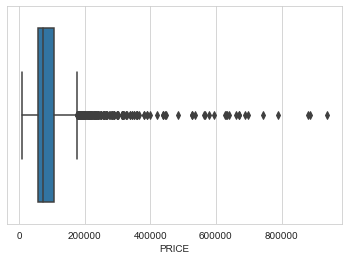

In [51]:
sns.boxplot(x=df_clean['PRICE'])  # Should do a log transformation here

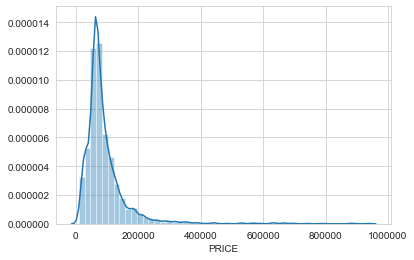

In [53]:
sns.distplot(df_clean['PRICE'])  # Your dependent variable 'must' be normally distributed

In [54]:
df_clean['PRICE_LOG'] = np.log(df_clean['PRICE'])  # This is the power of the log transform

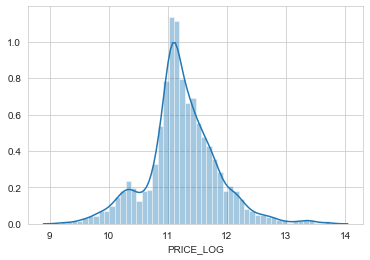

In [55]:
sns.distplot(df_clean['PRICE_LOG'])

## Methodology:
Step 1: Clean DF  
Step 2: Check if predictor variables are normally distributed  
* pd.DataFrame.hist(df, figsize=[15,15])  
  
Step 2.1: Visually check if your predictor variables have some sort of correlation (linear relatonship) with your target y

  
Step 2.1: If they are not, 

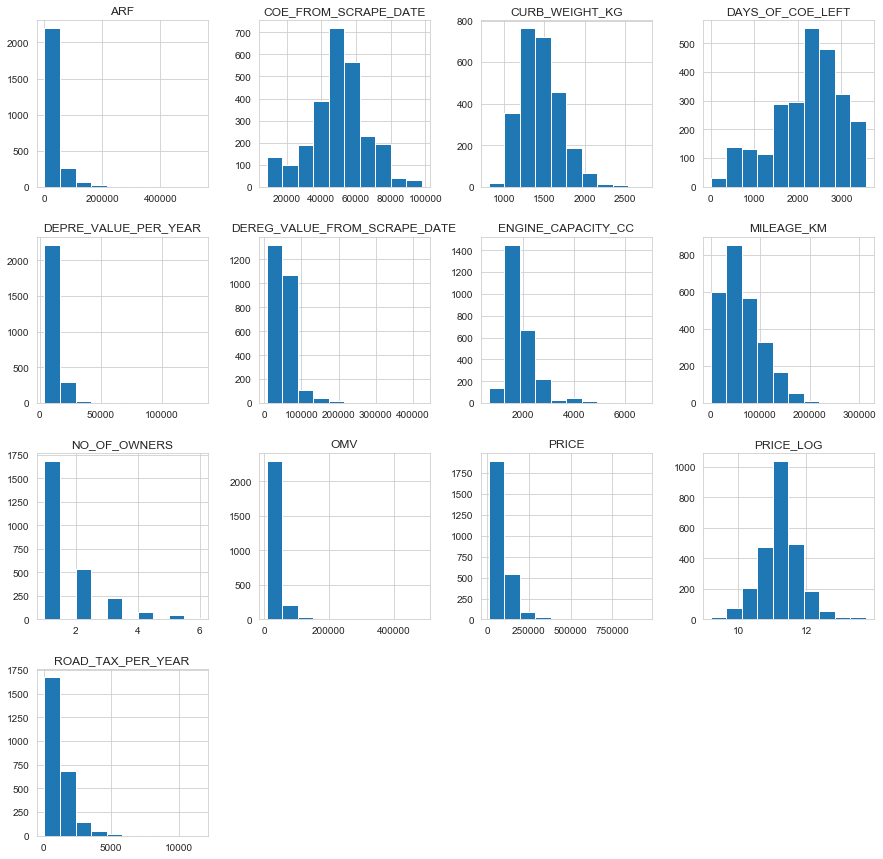

In [57]:
pd.DataFrame.hist(df_clean,figsize=[15,15]); # These are distributions of the variables itself

# y-axis = frequency. How often this occurs
# x-axis = the value of the variable itself

# We use this to check for normality of variables
# Normality = degree of which your variable is normally distributed
# Significance of it being normally distributed = otherwise violating assumptions of OLS

# Transformation is done on variables that are not normally distributed
# log if it's left/right-skewed -> check histogram again (distplot)

# eg. ARF is not reflected of majority of vehicles

In [ ]:
# DEPREciation value can be dropped because it is kind of like another metric of price
# Dereg value is also a function of your price. And this is usually factored into your car

In [ ]:
# Use boxplot to check for outliers

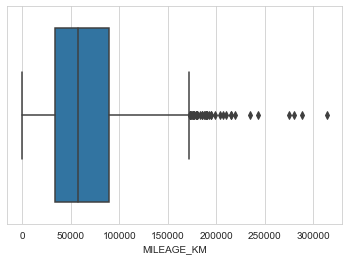

In [69]:
sns.boxplot(df_clean['MILEAGE_KM'])

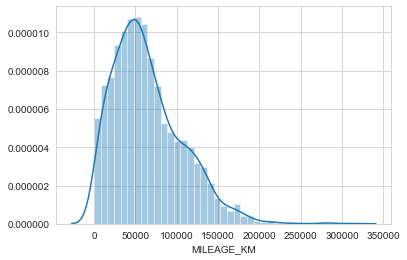

In [68]:
sns.distplot(df_clean['MILEAGE_KM'])

In [ ]:
# df_clean['ENGINE_CAPACITY_CC'] -> Can try categorizing it

In [60]:
df_clean['ARF'].describe()

count      2584.000000
mean      37006.611068
std       46182.599180
min        1316.000000
25%       14719.250000
50%       23706.500000
75%       40801.750000
max      536003.000000
Name: ARF, dtype: float64

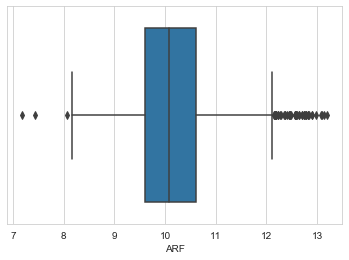

In [65]:
sns.boxplot(np.log(df_clean['ARF']))

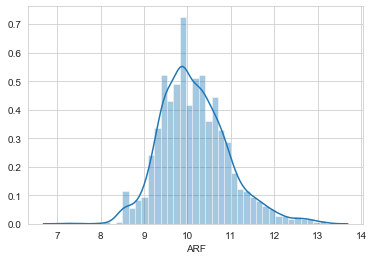

In [64]:
sns.distplot(np.log(df_clean['ARF']))

In [ ]:
sns.distplot(np.l)

In [49]:
df_clean.describe()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS
count,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,92442.819272,12770.305728,64502.158282,1155.412926,53730.590170,34751.988777,37006.611068,49992.115325,2196.682276,1881.769350,1446.806502,1.570820
std,77491.457150,10462.140400,42034.963816,889.314902,35010.161277,36169.097440,46182.599180,16215.045599,815.311996,670.018065,252.064686,0.962527
min,9800.000000,3950.000000,6.000000,50.000000,6653.000000,6510.000000,1316.000000,8501.000000,0.000000,658.000000,810.000000,1.000000
25%,57300.000000,8360.000000,33634.000000,684.000000,38170.500000,18693.500000,14719.250000,40000.000000,1701.750000,1497.000000,1275.000000,1.000000
50%,72800.000000,10435.000000,57000.000000,742.000000,47876.000000,25647.000000,23706.500000,50951.000000,2317.000000,1598.000000,1425.000000,1.000000
75%,104800.000000,13972.500000,89000.000000,1210.000000,60993.500000,36995.500000,40801.750000,58192.750000,2767.000000,1998.000000,1610.000000,2.000000
max,938000.000000,131070.000000,313778.000000,11550.000000,423396.000000,487275.000000,536003.000000,97889.000000,3563.000000,6749.000000,2730.000000,6.000000


In [ ]:
# df.corr() -> just use this to remove predictor variables that are highly correlated
# when do we do lasso/elastic net? (figure it out)

# plot a row in the pairplot -> separate a df for this pairplot consideration
# so only take out the target y to predictor variable

In [48]:
# Checking the number of brands in the dataset

# New Column ATAS
# New Column Budget Cars
# Top 20 brands
# Am I comfortable with grouping uncommon cars into others?

print(df_clean.loc[:,'BRAND'],'\n','\n')
print(df_clean.loc[:,'BRAND'].value_counts())
print(len(df_clean.loc[:,'BRAND'].value_counts()))

3                Audi
4              Toyota
5       Mercedes-Benz
7                 BMW
9                Audi
            ...      
3981    Mercedes-Benz
3982           Toyota
3983    Mercedes-Benz
3984             MINI
3985           Nissan
Name: BRAND, Length: 2584, dtype: object 
 

Toyota           405
Mercedes-Benz    374
Honda            309
BMW              286
Mazda            139
Audi             127
Nissan           127
Volkswagen       107
Kia               78
Hyundai           77
Volvo             63
Mitsubishi        58
Subaru            56
Porsche           51
Lexus             49
MINI              40
Suzuki            33
Citroen           22
Jaguar            22
Chevrolet         19
Renault           19
Maserati          18
Land              16
Ford              14
Infiniti          14
Peugeot           13
Ferrari           11
Bentley            6
Lamborghini        6
McLaren            5
Opel               4
Jeep               3
Skoda              3
Rolls-Royce        2

In [ ]:
# Interesting insights from data:
# Mercedes-BENZ actually second highest sold car. Highest resale? More things we can look into for this

In [56]:
# Future Ideas:
# Plot GDP against Trends of bought Mercedes

In [ ]:
# 